In [2]:
# Basic setup: imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from ucimlrepo import fetch_ucirepo

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [4]:
# Fetching the data
wdbc = fetch_ucirepo(id=17)

# Quick checks of what we got
print("Dataset object type:", type(wdbc))
print("Dataset name:", wdbc.metadata.name)
print("Number of instances:", wdbc.metadata.num_instances)
print("Number of features:", wdbc.metadata.num_features)

Dataset object type: <class 'ucimlrepo.dotdict.dotdict'>
Dataset name: Breast Cancer Wisconsin (Diagnostic)
Number of instances: 569
Number of features: 30


In [5]:
x = wdbc.data.features
y = wdbc.data.targets
ids = wdbc.data.ids

In [6]:
selected_columns_x = x[['texture1', 'area3', 'smoothness3']]
reduced_data = pd.concat([ids, selected_columns_x, y], axis=1)
print(reduced_data)
reduced_data.to_pickle('wdbc_reduced_data.pkl') 

           ID  texture1   area3  smoothness3 Diagnosis
0      842302     10.38  2019.0      0.16220         M
1      842517     17.77  1956.0      0.12380         M
2    84300903     21.25  1709.0      0.14440         M
3    84348301     20.38   567.7      0.20980         M
4    84358402     14.34  1575.0      0.13740         M
..        ...       ...     ...          ...       ...
564    926424     22.39  2027.0      0.14100         M
565    926682     28.25  1731.0      0.11660         M
566    926954     28.08  1124.0      0.11390         M
567    927241     29.33  1821.0      0.16500         M
568     92751     24.54   268.6      0.08996         B

[569 rows x 5 columns]


In [11]:
# Preparing the data for statistical analysis of initial data in the three columns
statistic_data = reduced_data.drop(columns=['ID'])
count_ys = statistic_data['Diagnosis'].value_counts()
stats = (
    statistic_data
    .groupby('Diagnosis')[['texture1', 'area3', 'smoothness3']]
    .agg(['mean', 'max', 'min', 'std'])
)
print (count_ys)
print("\n") 
print(stats)

Diagnosis
B    357
M    212
Name: count, dtype: int64


            texture1                                area3                 \
                mean    max    min       std         mean     max    min   
Diagnosis                                                                  
B          17.914762  33.81   9.71  3.995125   558.899440  1210.0  185.2   
M          21.604906  39.28  10.38  3.779470  1422.286321  4254.0  508.1   

                      smoothness3                             
                  std        mean     max      min       std  
Diagnosis                                                     
B          163.601424    0.124959  0.2006  0.07117  0.020013  
M          597.967743    0.144845  0.2226  0.08822  0.021870  


In [12]:
# Finding the outlier in each column
features = ['texture1', 'area3', 'smoothness3']

def detect_outliers_multi(df, features):
    outlier_rows = pd.DataFrame()

    for col in features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower) | (df[col] > upper)]
        outlier_rows = pd.concat([outlier_rows, outliers])

    # Drop duplicates (rows that are outliers in more than one feature)
    outlier_rows = outlier_rows.drop_duplicates()
    return outlier_rows

outliers = detect_outliers_multi(statistic_data, features)
print("Outliers detected across key attributes:")
print(outliers)

Outliers detected across key attributes:
     texture1   area3  smoothness3 Diagnosis
219     32.47  2477.0      0.14080         M
232     33.81   470.9      0.09994         B
239     39.28  1408.0      0.13650         M
259     33.56  1035.0      0.18830         M
265     31.12  3432.0      0.14010         M
455     30.72   705.6      0.11720         B
562     30.62   915.0      0.14170         M
0       10.38  2019.0      0.16220         M
1       17.77  1956.0      0.12380         M
18      22.15  2398.0      0.15120         M
23      23.04  2615.0      0.14010         M
24      21.38  2215.0      0.18050         M
56      18.57  2145.0      0.16240         M
82      24.91  2562.0      0.15730         M
108     19.67  2360.0      0.17010         M
122     20.20  2073.0      0.16960         M
162     18.15  2232.0      0.14380         M
164     22.04  2403.0      0.12280         M
180     21.87  3216.0      0.14720         M
181     26.57  2089.0      0.14910         M
202     26.67 

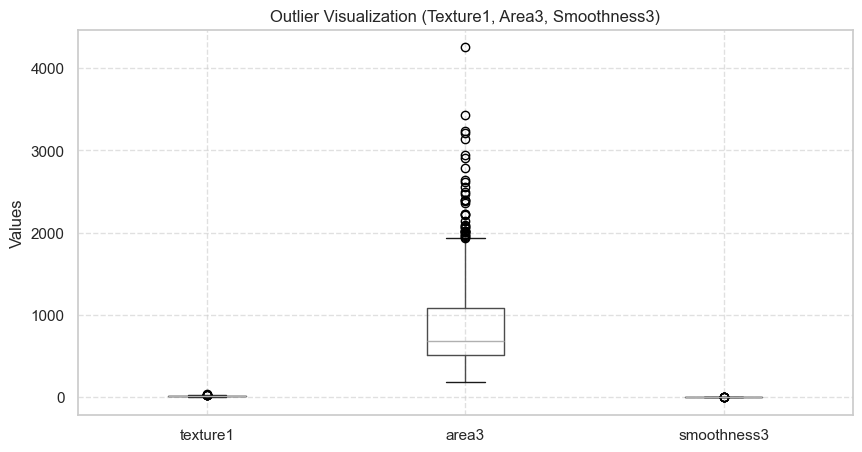

In [13]:
# plptting the boxplot of the main columns

plt.figure(figsize=(10,5))
statistic_data.boxplot(column=features)
plt.title("Outlier Visualization (Texture1, Area3, Smoothness3)")
plt.ylabel("Values")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [ ]:
data_shuffled = reduced_data.sample(frac=1, random_state=42).reset_index(drop=True)
data_shuffled['fold'] = np.arange(len(data_shuffled)) % 10

# If you want 80% of data for training
# training = data_shuffled[data_shuffled['fold'].isin([0,1,2,3,4,5,6,7])]

In [8]:
print(reduced_data_noID.columns.tolist())

['texture1', 'area3', 'smoothness3', 'Diagnosis']


In [10]:
reduced_data_noID = pd.concat([selected_columns_x, y], axis=1)
for i in range(len(reduced_data_noID)):
    if reduced_data_noID["Diagnosis"][i] in ("M", "m"):
        reduced_data_noID["Diagnosis"][i] = 1
    else:
        reduced_data_noID["Diagnosis"][i] = 0

print(reduced_data_noID["Diagnosis"].value_counts())
reduced_data.to_pickle('wdbc_reduced_data_noID_binaryDiagnosis.pkl') 



Diagnosis
0    357
1    212
Name: count, dtype: int64


/var/folders/gw/rlk99qwn38x570qq1rdmhp180000gn/T/ipykernel_5873/2008647902.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  reduced_data_noID["Diagnosis"][i] = 1
/var/folders/gw/rlk99qwn38x570qq1rdmhp180000gn/T/ipykernel_5873/2008647902.p

In [14]:
# Normalizing the data for each feature
features = reduced_data_noID.drop(columns=['Diagnosis'])
result = reduced_data_noID['Diagnosis']

# linier normalization formula: (x - min) / (max - min)
features_scaled = (features - features.min()) / (features.max() - features.min())

normalized_data = pd.concat([features_scaled, result.reset_index(drop=True)], axis=1)

print(normalized_data.head())
reduced_data.to_pickle('wdbc_reduced_data_noID_binaryDiagnosis_normalized.pkl') 


   texture1     area3  smoothness3 Diagnosis
0  0.022658  0.450698     0.601136         1
1  0.272574  0.435214     0.347553         1
2  0.390260  0.374508     0.483590         1
3  0.360839  0.094008     0.915472         1
4  0.156578  0.341575     0.437364         1
